# Social Network Sentiment Analysis   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pxUaSM778-1GZASCo2t9W91RSsbsxoBN#scrollTo=kCE_C2OdhD1q)  
This repository will analyze the comments on Reddit regardings electric vehicle.

# Load Reddit dataset

In [ ]:
# import library
import pandas as pd

In [ ]:
# load reddit tweet dataset
df_reddit = pd.read_excel("EV_community_discussion_data.xlsx", sheet_name='Reddit')

# View the dataset
df_reddit

,id,comment,title,date
0,R1,It's really just time now. Electric are good e...,How far can an Electric Car make it in Australia?,2020-01-15
1,R2,There's about 5 chargefox chargers at my local...,How far can an Electric Car make it in Australia?,2020-01-15
2,R3,Doesn't exactly present a glowing review reall...,How far can an Electric Car make it in Australia?,2020-01-15
3,R4,"I've been thinking a ""Swap and Go"" system woul...",How far can an Electric Car make it in Australia?,2020-01-15
4,R5,I was looking forward to good information and ...,How far can an Electric Car make it in Australia?,2020-01-15
...,...,...,...,...
1529,R1530,Almost...\n\nThe cheapest model is the 70.\n\n...,"The UK and other countries get concessions, gr...",2020-03-08
1530,R1531,"Fair enough, I was just going by the site and ...","The UK and other countries get concessions, gr...",2020-03-08
1531,R1532,"Yeah, their design section is a little confusi...","The UK and other countries get concessions, gr...",2020-03-08
1532,R1533,"**Looks**, inside and out. Lamborghinis have j...","The UK and other countries get concessions, gr...",2020-03-08


Select a subset of columns required for the analysis

In [ ]:
df_reddit = df_reddit[['date', 'comment']]

In [ ]:
print(df_reddit.shape[0], 'records in the dataset')

1534 records in the dataset


In [ ]:
# check missing values
df_reddit.isnull().sum()

date        0
comment    24
dtype: int64

In [ ]:
# check the data type to make sure date is in the right format
df_reddit.dtypes

date       datetime64[ns]
comment            object
dtype: object

# Data Pre-processing

**Count the number of words in each comment**

In [ ]:
df_reddit['word_count'] = df_reddit['comment'].apply(lambda x: len(str(x).split(" ")))
df_reddit.sort_values('word_count', ascending=[False])[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,comment,word_count
941,2020-02-28,Dual citizen Australian/American here who spen...,520
942,2020-02-28,I'm not sure how many people here are actually...,470
1533,2020-03-08,"Fair enough. Just seemed odd, that's all.\n\nJ...",389
192,2020-01-31,The issue with bringing advanced manufacturing...,373
944,2020-02-28,> Are charging stations something you hardly s...,360


**Count the number of characters of each comment**

In [ ]:
df_reddit['char_count'] = df_reddit['comment'].str.len()  # Include the spaces
df_reddit.sort_values('char_count', ascending=[False])[:5]

,date,comment,word_count,char_count
942,2020-02-28,I'm not sure how many people here are actually...,470,3606.0
941,2020-02-28,Dual citizen Australian/American here who spen...,520,2926.0
1533,2020-03-08,"Fair enough. Just seemed odd, that's all.\n\nJ...",389,2233.0
192,2020-01-31,The issue with bringing advanced manufacturing...,373,2208.0
188,2020-01-29,I want an electric 2nd car for our family. Wit...,357,2106.0


**Box plot analysis for number of words and characters in each comment**

There are some comments contain lot of words may need to remove because according to the box plot, most of the tweets have less than ~320 words  
And most of the comments have less than 2500 characters, thus, need to remove some of them

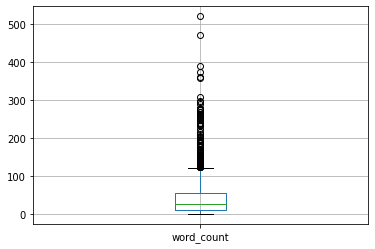

In [ ]:
df_reddit[['word_count']].boxplot()

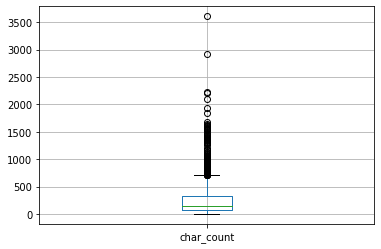

In [ ]:
df_reddit[['char_count']].boxplot()

### **Remove extreme values**  
Remove any comment that has more than 320 words and 2500 characters

In [ ]:
df_reddit = df_reddit[(df_reddit["word_count"] < 320) & (df_reddit["char_count"] < 2500)]
df_reddit.info

<bound method DataFrame.info of            date  ... char_count
0    2020-01-15  ...      195.0
1    2020-01-15  ...      357.0
2    2020-01-15  ...      481.0
3    2020-01-15  ...      309.0
4    2020-01-15  ...      731.0
...         ...  ...        ...
1528 2020-03-08  ...     1031.0
1529 2020-03-08  ...      144.0
1530 2020-03-08  ...      503.0
1531 2020-03-08  ...     1014.0
1532 2020-03-08  ...     1644.0

[1504 rows x 4 columns]>

In [ ]:
# return the selected columns for next steps
df_reddit = df_reddit[['date','comment']]

# Text pre-processing

### Transform to lowercase
Because Python is a case-sensitive language. Thus case distinction would be unnecessary

In [ ]:
df_reddit['comment'] = df_reddit['comment'].str.lower()
# View the df
df_reddit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,comment
0,2020-01-15,it's really just time now. electric are good e...
1,2020-01-15,there's about 5 chargefox chargers at my local...
2,2020-01-15,doesn't exactly present a glowing review reall...
3,2020-01-15,"i've been thinking a ""swap and go"" system woul..."
4,2020-01-15,i was looking forward to good information and ...


### Remove duplicate values

In [ ]:
# Remove duplicate values
duplicate_count = len(df_reddit['comment'])-len(df_reddit['comment'].drop_duplicates())

print(duplicate_count, 'duplicate values')
print(df_reddit.shape[0], 'records before remove duplicates')

70 duplicate values
1504 records before remove duplicates


In [ ]:
# drop duplicates (keep the last comment of each of the duplicates)
df_reddit = df_reddit.drop_duplicates(subset='comment', keep="first")
print(df_reddit.shape[0], 'records record after removed duplicate values:')

1434 records record after removed duplicate values:


### Remove special characters
The given dataset contains some urls and unique characters (@, #) which are not relevant for analysis, thus those words will be removed

In [ ]:
# Import Regular Expression Python module
import re

# Define function
def cleanUpComment(comment):
  # remove any sequence of characters followed by '@' sign
  unique_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(comment))
  
  # remove multiple spaces
  spaces_removed = re.sub(r"\s\s+", " ", str(unique_tweet)) 

  return spaces_removed

df_reddit['comment'] = df_reddit['comment'].apply(cleanUpComment)
df_reddit.head(5)

,date,comment
0,2020-01-15,its really just time now electric are good eno...
1,2020-01-15,theres about 5 chargefox chargers at my local ...
2,2020-01-15,doesnt exactly present a glowing review really...
3,2020-01-15,ive been thinking a swap and go system would w...
4,2020-01-15,i was looking forward to good information and ...


### Remove regular expressions
A regular expression is a special sequence of characters that helps to match or find other strings or sets of strings. Does not help the machine learning process.

In [ ]:
df_reddit['comment'] = df_reddit['comment'].str.replace('[^\w\s]','')
df_reddit.head(5)

,date,comment
0,2020-01-15,its really just time now electric are good eno...
1,2020-01-15,theres about 5 chargefox chargers at my local ...
2,2020-01-15,doesnt exactly present a glowing review really...
3,2020-01-15,ive been thinking a swap and go system would w...
4,2020-01-15,i was looking forward to good information and ...


### Remove digits
In this sentiment analysis numbers or digits are not relevant. Therefore, remove any digit in the Tweet

In [ ]:
# define the function
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df_reddit['comment'] = df_reddit['comment'].apply(remove_digits)
df_reddit.head()

,date,comment
0,2020-01-15,its really just time now electric are good eno...
1,2020-01-15,theres about chargefox chargers at my local we...
2,2020-01-15,doesnt exactly present a glowing review really...
3,2020-01-15,ive been thinking a swap and go system would w...
4,2020-01-15,i was looking forward to good information and ...


### Remove Stopwords
Stopwords are irrelevant for NLP purposes because they occur frequently in the language. Therefore, they need to be removed from the dataset.  

In [ ]:
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# create stop words list
stop = stopwords.words('english')

# Remove not because 'not' is negative impact on sentiment analysis
stop.remove('not')

# Add some words to stop word list
sw_list = ['cant', 'dont', 'doesnt', 'didnt','even', 'get', 'got', 'im','isnt', 'one', 'thats', 'theyre', 'youre', 'theres', 'people', 'would', 'could', 'still', 'many', 'much', 'also', 'every' , 'well', ]
stop.extend(sw_list)

# Print the list of stop words
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
# Remove stop words (from NLTK stop word list) from the Tweets
df_reddit['comment'] = df_reddit['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_reddit.head(5)

,date,comment
0,2020-01-15,really time electric good enough city driving ...
1,2020-01-15,chargefox chargers local westfield read takes ...
2,2020-01-15,exactly present glowing review really almost f...
3,2020-01-15,ive thinking swap go system work electric cars...
4,2020-01-15,looking forward good information found not cho...


### Standardization of comment  
**Stemming**  
Remove prefix, suffix etc, to derive the base form of a word

In [ ]:
# import library
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# define the function
def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_reddit['comment_stemmed'] = df_reddit['comment'].apply(stemming_function)
df_reddit.head()

,date,comment,comment_stemmed
0,2020-01-15,really time electric good enough city driving ...,realli time electr good enough citi drive go r...
1,2020-01-15,chargefox chargers local westfield read takes ...,chargefox charger local westfield read take 15...
2,2020-01-15,exactly present glowing review really almost f...,exactli present glow review realli almost full...
3,2020-01-15,ive thinking swap go system work electric cars...,ive think swap go system work electr car car n...
4,2020-01-15,looking forward good information found not cho...,look forward good inform found not chosen best...


**Lemmatization**  
Converting the given word into it's base form according to the dictionary meaning of the word.

In [ ]:
# Download wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# import library
from nltk.stem import WordNetLemmatizer
lemmtizer = WordNetLemmatizer()

# Define the function
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df_reddit['comment_lemmatized'] = df_reddit['comment'].apply(lemmatize_function)
df_reddit

,date,comment,comment_stemmed,comment_lemmatized
0,2020-01-15,really time electric good enough city driving ...,realli time electr good enough citi drive go r...,really time electric good enough city driving ...
1,2020-01-15,chargefox chargers local westfield read takes ...,chargefox charger local westfield read take 15...,chargefox charger local westfield read take 15...
2,2020-01-15,exactly present glowing review really almost f...,exactli present glow review realli almost full...,exactly present glowing review really almost f...
3,2020-01-15,ive thinking swap go system work electric cars...,ive think swap go system work electr car car n...,ive thinking swap go system work electric car ...
4,2020-01-15,looking forward good information found not cho...,look forward good inform found not chosen best...,looking forward good information found not cho...
...,...,...,...,...
1528,2020-03-08,see reason remove make lower threshold current...,see reason remov make lower threshold current ...,see reason remove make lower threshold current...
1529,2020-03-08,almostthe cheapest model 70the 70d adds allwhe...,almostth cheapest model 70the 70d add allwheel...,almostthe cheapest model 70the 70d add allwhee...
1530,2020-03-08,fair enough going site see listed know teslas ...,fair enough go site see list know tesla beyond...,fair enough going site see listed know tesla b...
1531,2020-03-08,yeah design section little confusing probably ...,yeah design section littl confus probabl desig...,yeah design section little confusing probably ...


There are a lot of wording issues in Stemming, ex: remov, littl, electr,.. Thought observation, Lemmatization algorithm or original data seem to be better in this case when compared to Stemmming algorith.  
**Therefore, we can keep the original or Lemmatized data for further analysis**

In [ ]:
#df_reddit['comment'] = df_reddit['comment'].apply(lemmatize_function)
df_reddit = df_reddit[['date','comment']]

### Word frequency analysis

In [ ]:
word_frequency = pd.Series(' '.join(df_reddit['comment']).split()).value_counts()

In [ ]:
# Top common words
word_frequency[:10]  # get top 10

not          395
car          388
electric     337
cars         289
like         228
ev           159
years        152
australia    143
tesla        136
think        133
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


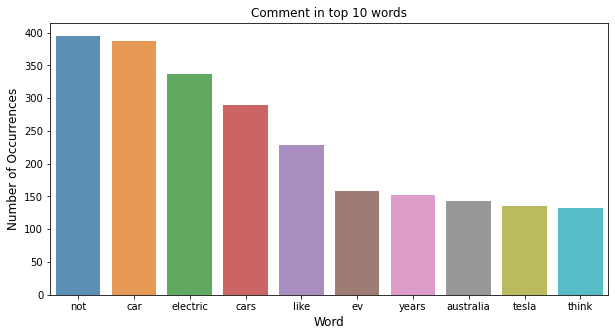

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Comment in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

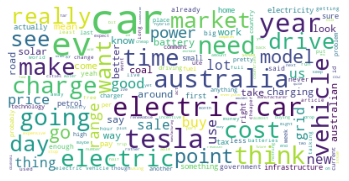

In [ ]:
# import library
from PIL import Image
from wordcloud import WordCloud

# create word cloud
corpus = list(df_reddit['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the word cloud we could identify that the terms **car, not, electric, ev, australia** has been mentioned frequently. Some of the words are expected - it will not generate much an insight.  
**Therefore, those high frequency non-insightful words will be removed.**

### Remove common words  
Based on the context, those expected and non-insightful words will be removed from the dataset

In [ ]:
# Creating a list of custom stopwords
new_words_to_remove = ["car", 'cars', "electric", "ev",'evs', 'vehicle', 'vehicles', 'australia', 'not', 'like', 'think', 'need', 'going', 'really']

In [ ]:
# Remove common words using lambda function
df_reddit['comment'] = df_reddit['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df_reddit.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,comment
0,2020-01-15,time good enough city driving replace fossil f...
1,2020-01-15,chargefox chargers local westfield read takes ...
2,2020-01-15,exactly present glowing review almost full tim...
3,2020-01-15,ive thinking swap go system work battery type ...
4,2020-01-15,looking forward good information found chosen ...


## Re-attempt frequency word list

In [ ]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_reddit['comment']).split()).value_counts()

In [ ]:
# Look at the top 10 words
word_frequency[:10]

years       152
tesla       136
market      126
charging    125
charge      118
time        117
power       109
range       108
coal        100
see          98
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


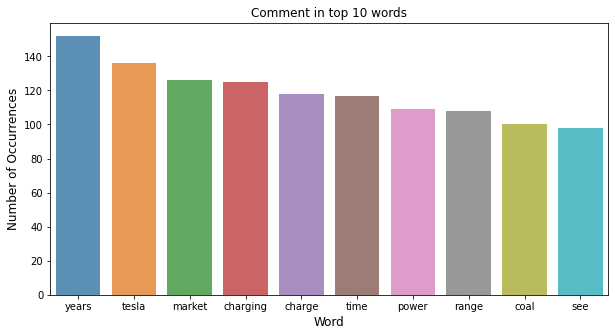

In [ ]:
# Visualize the top word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Comment in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

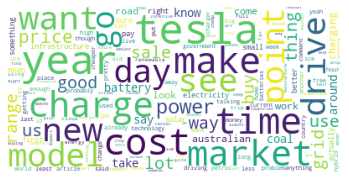

In [ ]:
# Generate word cloud
corpus = list(df_reddit['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()